# Dataset


In [ ]:
!wget https://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip

In [ ]:
!unzip spatial_envelope_256x256_static_8outdoorcategories.zip

In [ ]:
from os import listdir
from os.path import isfile, join

dataset = 'spatial_envelope_256x256_static_8outdoorcategories/'

imagens = [f for f in listdir(dataset) if isfile(join(dataset, f)) and '.jpg' in f]
imagens

['forest_for67.jpg',
 'coast_n384099.jpg',
 'mountain_n213080.jpg',
 'street_boston18.jpg',
 'coast_sun14.jpg',
 'mountain_nat891.jpg',
 'forest_nat1248.jpg',
 'forest_for114.jpg',
 'forest_text13.jpg',
 'mountain_sharp27.jpg',
 'insidecity_par173.jpg',
 'mountain_land142.jpg',
 'opencountry_n18002.jpg',
 'opencountry_land693.jpg',
 'insidecity_a129035.jpg',
 'street_gre211.jpg',
 'coast_nat639.jpg',
 'coast_natu912.jpg',
 'tallbuilding_archi629.jpg',
 'opencountry_land41.jpg',
 'street_street61.jpg',
 'forest_for93.jpg',
 'insidecity_gre318.jpg',
 'forest_nat719.jpg',
 'insidecity_bost109.jpg',
 'coast_land951.jpg',
 'mountain_land471.jpg',
 'street_par72.jpg',
 'coast_natu604.jpg',
 'coast_natu901.jpg',
 'forest_nat223.jpg',
 'forest_for102.jpg',
 'highway_bost157.jpg',
 'opencountry_natu557.jpg',
 'coast_land340.jpg',
 'opencountry_land703.jpg',
 'street_par119.jpg',
 'opencountry_n18011.jpg',
 'highway_art254.jpg',
 'forest_natu172.jpg',
 'mountain_moun37.jpg',
 'tallbuilding_art52

# Conjunto de Treino e Teste

In [ ]:
!mkdir -p data/train
!mkdir -p data/test

In [ ]:
from sklearn.model_selection import train_test_split
from shutil import copyfile
import os

x_train ,x_test = train_test_split(imagens,test_size=0.3)

for img in x_train:
  img_class = img.split('_')[0]

  if not os.path.exists('data/train/'+img_class):
      os.makedirs('data/train/'+img_class)

  copyfile(dataset+'/'+img, 'data/train/'+img_class+'/'+img)

for img in x_test:
  img_class = img.split('_')[0]

  if not os.path.exists('data/test/'+img_class):
      os.makedirs('data/test/'+img_class)

  copyfile(dataset+'/'+img, 'data/test/'+img_class+'/'+img)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

img_width = 256
img_height = 256

gen = ImageDataGenerator()
train_im = ImageDataGenerator(
               rescale=1./255,
               shear_range=0.2,
               horizontal_flip=False)
def train_images():
    train_generator = train_im.flow_from_directory (
            'data/train',
             target_size=(img_width, img_height),
             color_mode='rgb',
             batch_size=len(x_train),
             shuffle = True,
             class_mode='categorical')
    x =  train_generator
    return x[0][0], x[0][1]

In [ ]:
X_train, Y_train = train_images()

Found 2456 images belonging to 8 classes.


# CNN Autoencoder

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K


input_shape = (img_width, img_height, 3)

input_img = Input(shape=input_shape)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(1, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 1)         73    

In [ ]:
autoencoder.fit(X_train, X_train, epochs=15, verbose=1)

Epoch 1/15
59/59 [==============================] - 19s 95ms/step - loss: 0.0650
Epoch 2/15
59/59 [==============================] - 4s 70ms/step - loss: 0.0371
Epoch 3/15
59/59 [==============================] - 4s 69ms/step - loss: 0.0257
Epoch 4/15
59/59 [==============================] - 4s 68ms/step - loss: 0.0239
Epoch 5/15
59/59 [==============================] - 4s 71ms/step - loss: 0.0229
Epoch 6/15
59/59 [==============================] - 4s 70ms/step - loss: 0.0222
Epoch 7/15
59/59 [==============================] - 4s 68ms/step - loss: 0.0217
Epoch 8/15
59/59 [==============================] - 4s 72ms/step - loss: 0.0212
Epoch 9/15
59/59 [==============================] - 4s 70ms/step - loss: 0.0209
Epoch 10/15
59/59 [==============================] - 4s 70ms/step - loss: 0.0205
Epoch 11/15
59/59 [==============================] - 4s 74ms/step - loss: 0.0202
Epoch 12/15
59/59 [==============================] - 4s 71ms/step - loss: 0.0200
Epoch 13/15
59/59 [=================

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
autoencoder.load_weights('autoencoder.h5')

# Analisando os resultados

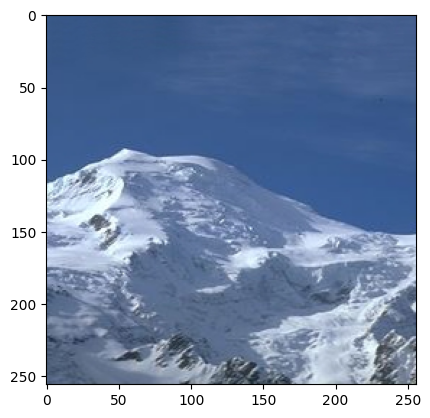

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

59/59 [==============================] - 2s 26ms/step


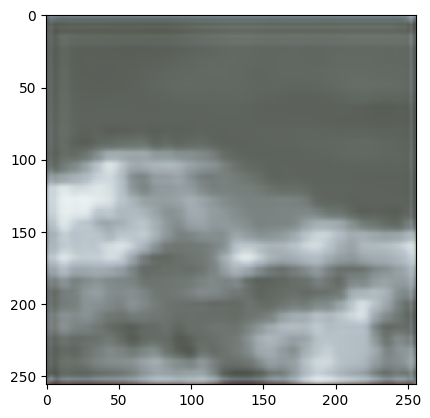

In [ ]:
import matplotlib.pyplot as plt

prediction = autoencoder.predict(X_train)
x =prediction[0].reshape(256,256,3) # imagem reconstruida pelo autoencoder
plt.imshow(x)


In [ ]:
encoder = Model(input_img, encoded)
img_train_features = encoder.predict(X_train)

59/59 [==============================] - 1s 14ms/step


In [ ]:
img_train_features[0].shape

(32, 32, 1)

In [ ]:
import numpy as np
np.array(list(img_train_features[0].reshape(1,1024)[0])).shape
    # test_codes = test_codes.reshape(test_codes.shape[0], test_codes.shape[1] * test_codes.shape[2] * test_codes.shape[3])


(1024,)

In [ ]:
np.array(list(img_train_features[0].reshape(1,1024)[0]))

array([0.07738708, 0.07047825, 0.07011082, ..., 0.00648646, 0.02705874,
       0.02356305], dtype=float32)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

img_width = 256
img_height = 256

gen = ImageDataGenerator()
train_im = ImageDataGenerator(
               rescale=1./255,
               shear_range=0.2,
               horizontal_flip=False)
def test_images():
    train_generator = train_im.flow_from_directory (
            'data/test',
             target_size=(img_width, img_height),
             color_mode='rgb',
             batch_size=len(x_test),
             shuffle = True,
             class_mode='categorical')
    x =  train_generator
    return x[0][0], x[0][1]

In [ ]:
X_test, Y_test = test_images()

Found 807 images belonging to 8 classes.


In [ ]:
Y_test

In [ ]:
import matplotlib.pyplot as plt

prediction = autoencoder.predict(X_test)
x =prediction[0].reshape(256,256,3)
plt.imshow(x)

26/26 [==============================] - 1s 41ms/step


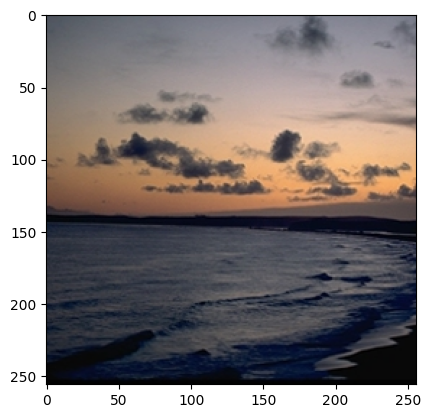

In [ ]:
plt.imshow(X_test[0])

In [ ]:
img_test_features = encoder.predict(X_test)
list(img_test_features[0].reshape(1,4096)[0])

In [ ]:
X_features_train = []
for v in img_train_features:
  X_features_train.append( list(v.reshape(1,4096)[0]) )

X_features_test = []
for v in img_test_features:
  X_features_test.append( list(v.reshape(1,4096)[0]) )

In [ ]:
import numpy as np
np.array(X_features_train).shape

In [ ]:
np.array(X_features_test).shape

In [ ]:
import pandas as pd
pd.DataFrame(np.array(X_features_test))

# Busca por Similaridade

In [ ]:
img_id_test = 178
plt.imshow(X_test[img_id_test])

In [ ]:
img_id = 0
img_sel = -1
min_dist = 1000000

for v in X_features_train:
  dist = np.linalg.norm(np.array(X_features_test[img_id_test])-np.array(v)) # distancia euclidiana entre vetores de caracteristicas
  if dist < min_dist:
    img_sel = img_id
    min_dist = dist
  img_id += 1

print('img_sel=',img_sel,' min_dist=',min_dist)
plt.imshow(X_train[img_sel])

In [ ]:
img_id_test = 5
plt.imshow(X_test[img_id_test])

In [ ]:
img_id = 0
img_sel = -1
min_dist = 1000000

for v in X_features_train:
  dist = np.linalg.norm(np.array(X_features_test[img_id_test])-np.array(v)) # distancia euclidiana entre vetores de caracteristicas
  if dist < min_dist:
    img_sel = img_id
    min_dist = dist
  img_id += 1

print('img_sel=',img_sel,' min_dist=',min_dist)
plt.imshow(X_test[img_sel])